## **Lending Club Case Study for Loan Defaulters Prediction System**

**Introduction**

In this case study, we are attempting to solve a real world business problem using Exploratory Data Science techniques. We will be understanding and solving a risk analytics problem in Banking and Financial Domain.We will be checking how data can be used effectively to solve business problems like defaulters prediction in Loan Lending club

**Business Problem Statement:**

We are working for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

*   If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
*   If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


The data given to us contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

**Business Objectives:**

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

*   Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

*   Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.


*   Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 


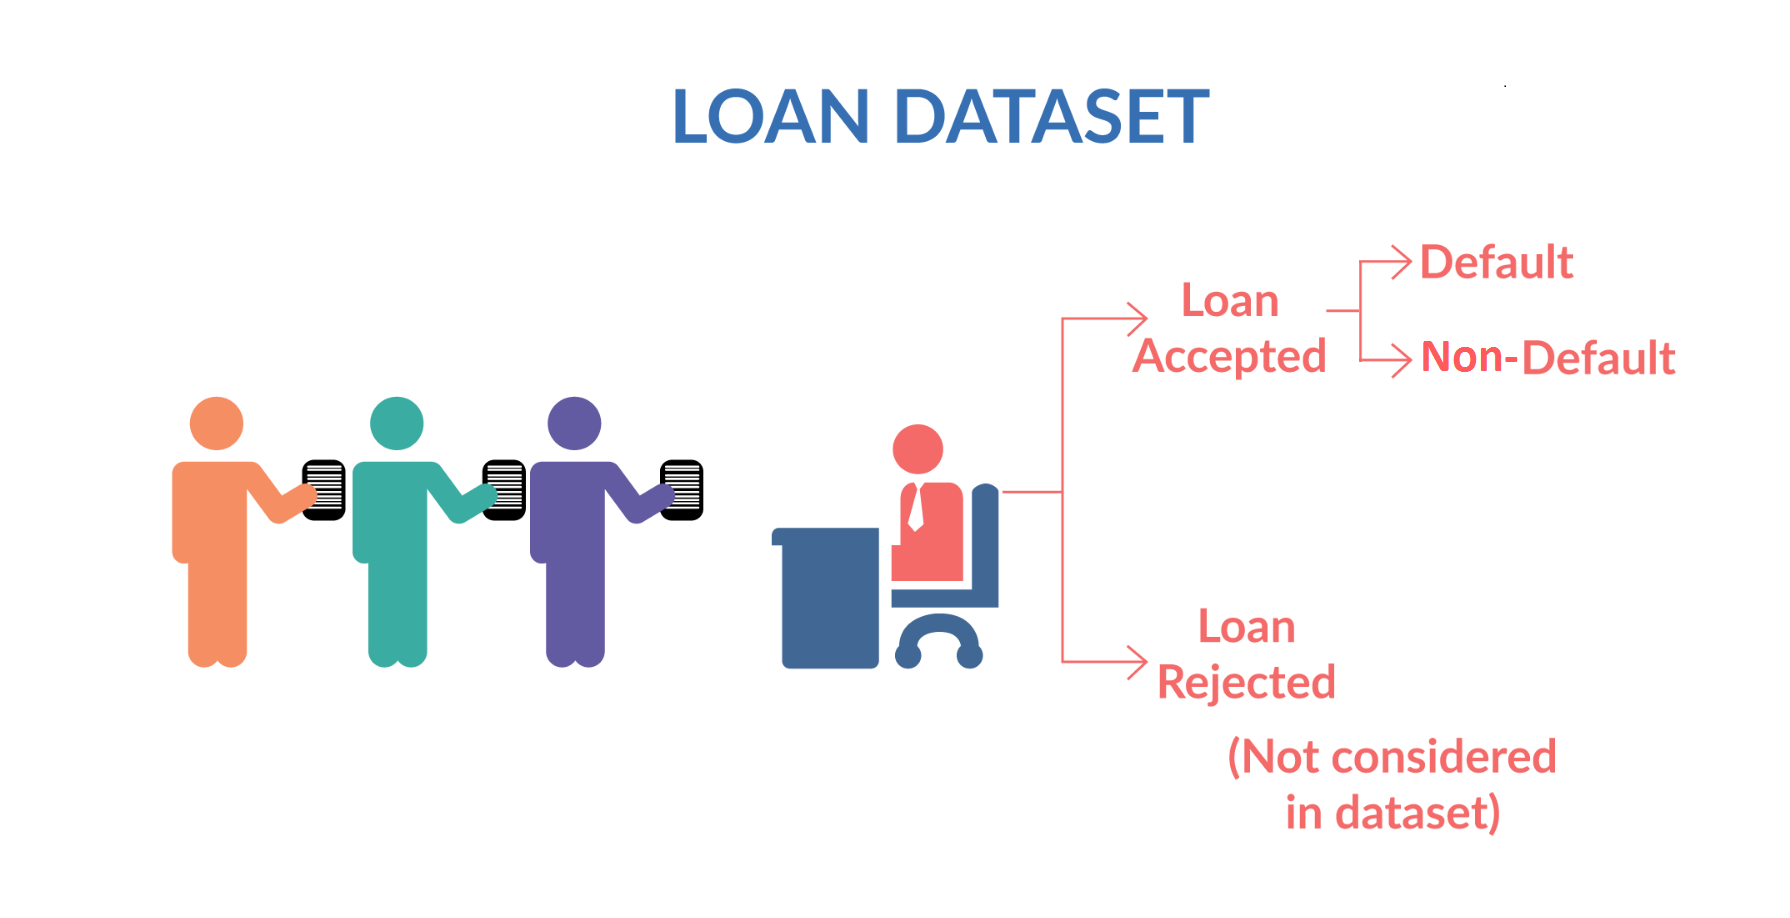

**Data Understanding**

You can access the data dictionary which describes the meaning of these variables which will be used in the Case Study:







Columns | Description
--- | ---
addr_state | The state provided by the borrower in the loan application
annual_inc | The self-reported annual income provided by the borrower during registration.
application_type | Indicates whether the loan is an individual application or a joint application with two co-borrowers
collection_recovery_fee | post charge off collection fee
collections_12_mths_ex_med | Number of collections in 12 months excluding medical collections
delinq_2yrs | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
dti | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line | The month the borrower's earliest reported credit line was opened
emp_length | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
funded_amnt | The total amount committed to that loan at that point in time.
funded_amnt_inv | The total amount committed by investors for that loan at that point in time.
grade | LC assigned loan grade
home_ownership | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
id | A unique LC assigned ID for the loan listing.
initial_list_status | The initial listing status of the loan. Possible values are – W, F
inq_last_6mths | The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
installment | The monthly payment owed by the borrower if the loan originates.
int_rate | Interest Rate on the loan
issue_d | The month which the loan was funded
last_credit_pull_d | The most recent month LC pulled credit for this loan
last_pymnt_amnt | Last total payment amount received
last_pymnt_d | Last month payment was received
loan_amnt | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
loan_status | Current status of the loan
open_acc | The number of open credit lines in the borrower's credit file.
out_prncp | Remaining outstanding principal for total amount funded
out_prncp_inv | Remaining outstanding principal for portion of total amount funded by investors
policy_code | publicly available policy_code=1\nnew products not publicly available policy_code=2
pub_rec | Number of derogatory public records
pub_rec_bankruptcies | Number of public record bankruptcies
purpose | A category provided by the borrower for the loan request. 
pymnt_plan | Indicates if a payment plan has been put in place for the loan
recoveries | post charge off gross recovery
revol_bal | Total credit revolving balance
revol_util | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
sub_grade | LC assigned loan subgrade
term | The number of payments on the loan. Values are in months and can be either 36 or 60.
title | The loan title provided by the borrower
total_acc | The total number of credit lines currently in the borrower's credit file
total_pymnt | Payments received to date for total amount funded
total_pymnt_inv | Payments received to date for portion of total amount funded by investors
total_rec_int | Interest received to date
total_rec_late_fee | Late fees received to date
total_rec_prncp | Principal received to date
verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified


##### Installing the dependency for improving the EDA process

In [ ]:
!pip install dataprep

**Importing libraries**

In [ ]:
#Importing libraries required for the case study and to plot charts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Regular Expressions for String manipulation
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

from dataprep.eda import plot_correlation


##### Mount the google drive which has the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Reading the loan.csv file and creating dataframe out of it

In [ ]:

# loan=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan.csv',dtype=object)

loan = pd.read_csv("/content/loan.csv",dtype=object)

#Check Shape,Info(Number of Rows and Columns) and datatype of loan data
#Also checking if file is read properly and is converted to the dataframe
print(loan.shape)
print(loan.info())
print(loan.dtypes)


(24220, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24220 entries, 0 to 24219
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 20.5+ MB
None
id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object




---



### **Data Cleaning and Manipulation**

In [ ]:
#Check for Duplicate rows in the dataset.The column used for checking is id column
print(loan.duplicated(subset=None,keep='first').count())
duplicate_rows=loan[loan.duplicated(['id'])]
duplicate_rows

#Output-There are no duplicate rows in the dataset

24220


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [ ]:
#Finding number of rows through sum function which have missing values

print('Number of rows having all values as null:')
print(loan.isnull().all(axis=1).sum())

#Output-There are 0 empty rows or rows having all the values as null in the entire dataset

#Finding number of coulmns through sum function which have missing values

print('Number of columns having all values as null:')
print(loan.isnull().all(axis=0).sum())

#Output-There are 54 empty columns or columns having all the values as null in the entire dataset


Number of rows having all values as null:
0
Number of columns having all values as null:
54


In [ ]:
#Finding out columns which have all null values

loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [ ]:
#Dropping the columns where all values are null as these columns won't add any value in our analysis

loan.drop(loan.iloc[:,53:105],inplace=True,axis=1)

In [ ]:
#Now, as a next step dropping other columns which are not required in the analysis as they contain most of the values as nulls

col_drop_l1=["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
loan.drop(labels=col_drop_l1,axis=1,inplace=True)
col_drop_l2=["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
loan.drop(labels=col_drop_l2,axis=1,inplace=True)
col_drop_l3=["member_id","url","emp_title","zip_code","tax_liens"]
loan.drop(labels=col_drop_l3,axis=1,inplace=True)

In [ ]:
#Checking dataframe shape after dropping columns

loan.shape

#Now we are left with 45 columns after data cleaning

(39717, 45)

In [ ]:
#Data Cleaning and Manipulation

#Extracting digits from Employee's length column i.e. Employee's Tenure.This variable will add value in our analysis

#Firstly filling null values with 0

#Print first 5 values from loan dataframe after this data manipulation

loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36 months,10.65%,162.87,B,B2,10,...,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0
1,1077430,2500,2500,2500,60 months,15.27%,59.83,C,C4,1,...,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0
2,1077175,2400,2400,2400,36 months,15.96%,84.33,C,C5,10,...,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0
3,1076863,10000,10000,10000,36 months,13.49%,339.31,C,C1,10,...,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0
4,1075358,3000,3000,3000,60 months,12.69%,67.79,B,B5,1,...,0,0,0,May-16,67.79,May-16,0,1,INDIVIDUAL,0


In [ ]:
#Data Clean on pub_rec_bankruptcies column as it will be used in analysis
print('Before cleaning pub_rec_bankruptcies')
print(loan.pub_rec_bankruptcies.isnull().sum())
print('After cleaning pub_rec_bankruptcies')
loan.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(loan.pub_rec_bankruptcies.isnull().sum())

Before cleaning pub_rec_bankruptcies
697
After cleaning pub_rec_bankruptcies
0


In [ ]:
#Data Manipulation and Cleaning step for removing % symbol from interest rate column to be used in analysis further
loan['int_rate']=loan['int_rate'].str.rstrip('%')

#Data Manipulation and Cleaning step for removing % symbol from revol_util column to be used in analysis further
loan['revol_util']=loan['revol_util'].str.rstrip('%')



In [ ]:
#Converting amount columns to numeric data as these values will be used in data modeling and plotting
columns1=['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[columns1]=loan[columns1].apply(pd.to_numeric)

In [ ]:
#Finding out percentages of various loan_status out of total loans issued

(loan.loan_status.value_counts()*100)/len(loan)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [ ]:
#Finding out percentages of various purpose of loans out of total loans issued

(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

**Univariate Analysis**

In [ ]:
#Getting quantitative variables with describe for loan amount
loan['loan_amnt'].describe()


count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

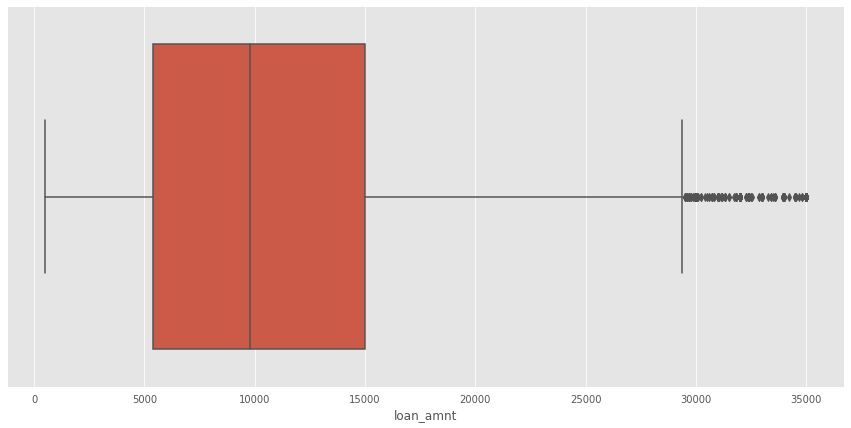

In [ ]:
#Drawing Box Plot for loan amount
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loan.loan_amnt)

In [ ]:
#Getting quantitative variables with describe for total payment
loan.total_pymnt.describe()

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

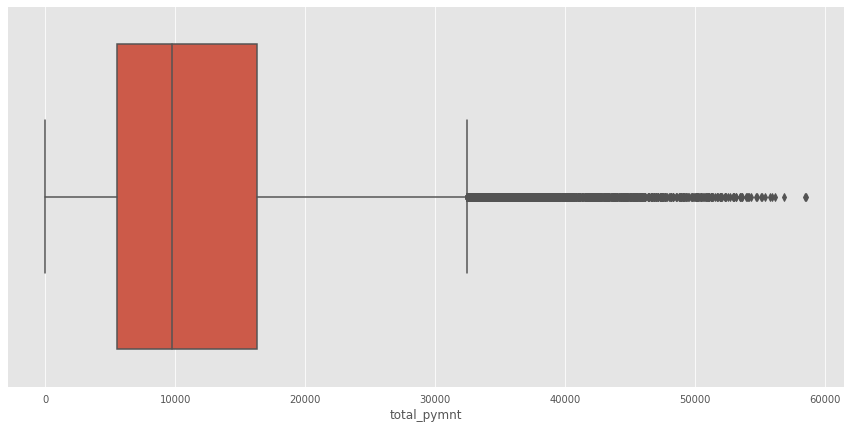

In [ ]:
#Drawing Boxplot for Total Payment
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loan.total_pymnt)

In [ ]:
#Basic Statistics with Quantitative Variables

print('Before removing Outliers from Annual Income :\n')
print(loan['annual_inc'].describe(),'\n')

#Removing Outliers i.e. Quantile 0.99 from Annual Income attribute

loan=loan[loan["annual_inc"]< loan["annual_inc"].quantile(0.99)]

print('After removing outliers from annual Income:\n')
print(loan["annual_inc"].describe())

Before removing Outliers from Annual Income :

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64 

After removing outliers from annual Income:

count     38924.000000
mean      64096.802806
std       32378.165267
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80000.000000
max      188004.000000
Name: annual_inc, dtype: float64


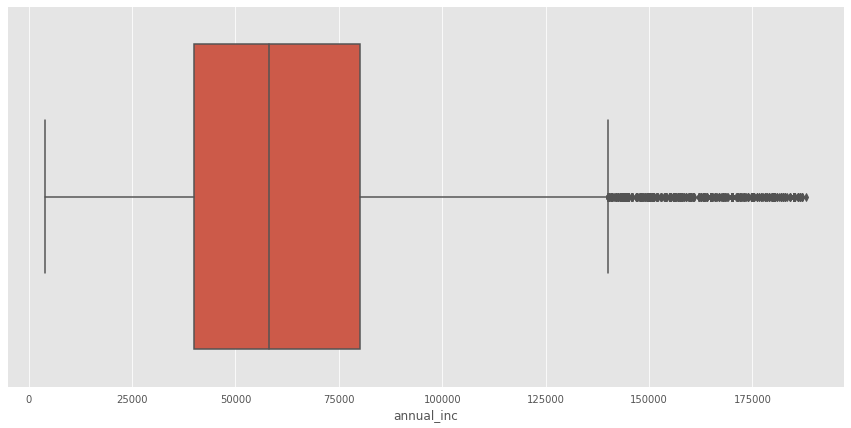

In [ ]:
#Drawing Boxplot for Annual Income
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loan.annual_inc)

In [ ]:
#Basic Statistics with Interest Rate

loan['int_rate'].describe()

count    38924.000000
mean        11.997265
std          3.714175
min          5.420000
25%          9.070000
50%         11.830000
75%         14.540000
max         24.400000
Name: int_rate, dtype: float64

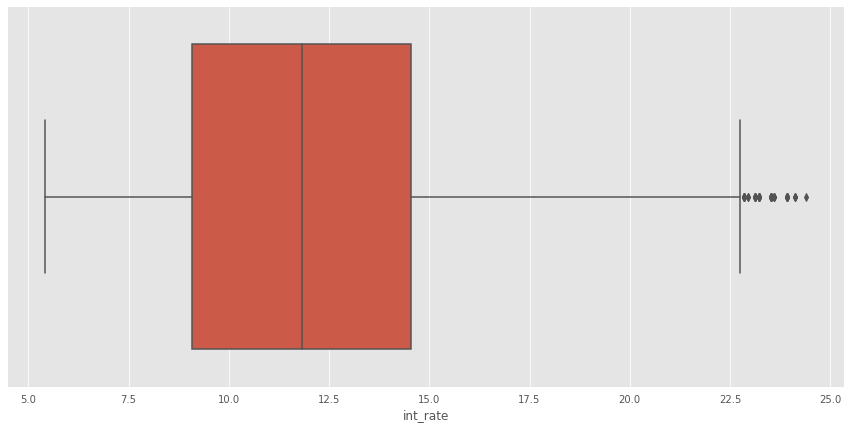

In [ ]:
#Drawing Boxplot for Interest Rate
plt.figure(figsize=(15,7))
with plt.style.context('ggplot'):
  sns.boxplot(loan.int_rate)

**Bivariate Analysis**

In [ ]:
#Correlation Analysis-Bivariate Matrix
loan_correlation=loan.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,total_pymnt
loan_amnt,1.000000,0.981646,0.939678,0.304098,0.929711,0.161675,0.415747,0.081261,0.884490
funded_amnt,0.981646,1.000000,0.957980,0.308150,0.955619,0.161078,0.411057,0.081068,0.901105
funded_amnt_inv,0.939678,0.957980,1.000000,0.302427,0.903662,0.169571,0.394422,0.089162,0.878961
int_rate,0.304098,0.308150,0.302427,1.000000,0.278697,0.016518,0.069599,0.113775,0.302702
installment,0.929711,0.955619,0.903662,0.278697,1.000000,0.133465,0.412200,0.069475,0.854704
emp_length,0.161675,0.161078,0.169571,0.016518,0.133465,1.000000,0.200470,0.055163,0.147419
annual_inc,0.415747,0.411057,0.394422,0.069599,0.412200,0.200470,1.000000,-0.097444,0.394293
dti,0.081261,0.081068,0.089162,0.113775,0.069475,0.055163,-0.097444,1.000000,0.079382
total_pymnt,0.884490,0.901105,0.878961,0.302702,0.854704,0.147419,0.394293,0.079382,1.000000


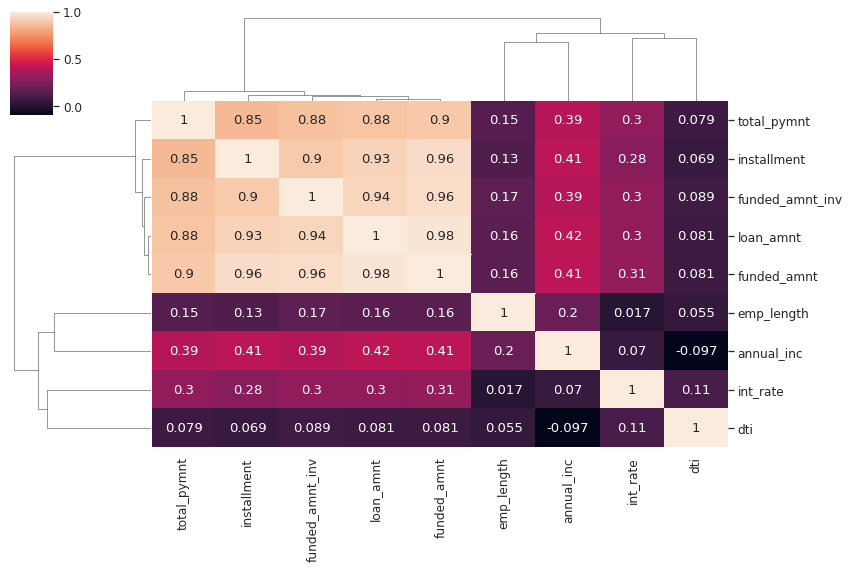

In [ ]:

#Heatmap to show correlation amongst various variables

sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12,8))
plt.show()

#Findings are as Follows-
#1.Annual Income to Debt To Income Ratio i.e. dti are negatively correlated
#2.Loan Amount,Investor Amount and Funding Amount are strongly correlated
#3.Positive correlation between Annual Income and employment years
#4.Positive correlation between annual income and funded amount that means people with high income gets high funded amount
#5.Positive correlation between annual income and total payment

In [ ]:
#Cleaning more data which is not required
column_drop_l4=["application_type","policy_code","initial_list_status","installment","pymnt_plan"]
loan.drop(labels=column_drop_l4,axis=1,inplace=True)
print(loan.shape)
loan.isnull().sum()

(38924, 40)


id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    49
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_

**Creating Buckets for analysis**

In [ ]:
#Creating Bins for further analysis
#Creating categories for loan amounts for further bivariate analysis
loan['loan_amnt_categories']=pd.cut(loan['loan_amnt'],[0,7000,14000,21000,28000,35000],labels=['0-7000','7000-14000','14000-21000','21000-28000','28000+'])

#Creating categories for annual incomes for further bivariate analysis
loan['annual_inc_categories']=pd.cut(loan['annual_inc'],[0,20000,40000,60000,80000,1000000],labels=['0-20000','20000-40000','40000-60000','60000-80000','80000+'])

#Creating categories for interest rates for further bivariate analysis
loan['interest_rate_categories']=pd.cut(loan['int_rate'],[0,10,12.5,16,20],labels=['0-10','10-13','12.5-16','16+'])

#Creating dti into buckets for further bivariate analysis
loan['dti_categories']=pd.cut(loan['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','25+'])

print(loan.shape)
loan.head(5)

(38924, 44)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies,loan_amnt_categories,annual_inc_categories,interest_rate_categories,dti_categories
0,1077501,5000,5000,4975.0,36 months,10.65,B,B2,10,RENT,...,0,Jan-15,171.62,May-16,0,0,0-7000,20000-40000,10-13,NaN
1,1077430,2500,2500,2500.0,60 months,15.27,C,C4,1,RENT,...,1.11,Apr-13,119.66,Sep-13,0,0,0-7000,20000-40000,12.5-16,0-5
2,1077175,2400,2400,2400.0,36 months,15.96,C,C5,10,RENT,...,0,Jun-14,649.91,May-16,0,0,0-7000,0-20000,12.5-16,5-10
3,1076863,10000,10000,10000.0,36 months,13.49,C,C1,10,RENT,...,0,Jan-15,357.48,Apr-16,0,0,7000-14000,40000-60000,12.5-16,15-20
4,1075358,3000,3000,3000.0,60 months,12.69,B,B5,1,RENT,...,0,May-16,67.79,May-16,0,0,0-7000,60000-80000,12.5-16,15-20


**Univariate Analysis**

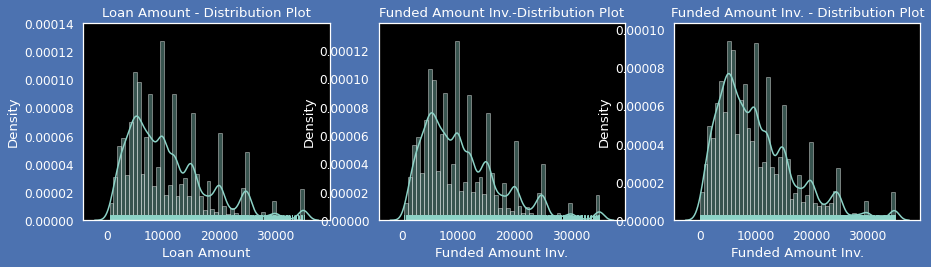

In [ ]:
#Distribution of Loan amounts using distribution plot
plt.figure(figsize=(15,8),facecolor='b')
# sns.set_style("dark")
with plt.style.context('dark_background'):

  #subplot1
  plt.subplot(2,3,1)
  ax=sns.distplot(loan['loan_amnt'],rug=True)
  ax.set(title='Loan Amount - Distribution Plot',xlabel='Loan Amount')


  #subplot2
  plt.subplot(2,3,2)
  ax=sns.distplot(loan['funded_amnt'],rug=True)
  ax.set(title='Funded Amount Inv.-Distribution Plot',xlabel='Funded Amount Inv.')


  #subplot3

  plt.subplot(2, 3, 3)
  ax = sns.distplot(loan['funded_amnt_inv'],rug = True)
  ax.set(title='Funded Amount Inv. - Distribution Plot',xlabel='Funded Amount Inv.')

  plt.show()

#Findings are as follows-
#1.Distribution of amounts for all three looks very much similar.



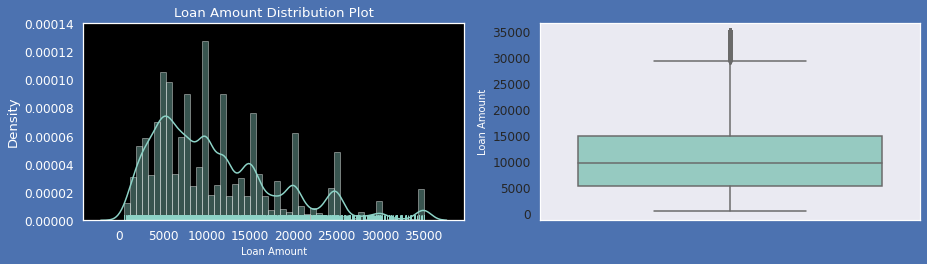

In [ ]:
#Univariate Analysis for Loan Amount Variable

with plt.style.context('dark_background'):
  plt.figure(figsize=(15,8),facecolor='b')
  
  #Subplot 1

  plt.subplot(2,2,1)
  ax=sns.distplot(loan['loan_amnt'],rug=True)
  ax.set(title='Loan Amount Distribution Plot')
  ax.set_xlabel('Loan Amount', Fontsize=10,color='w')

  #Subplot 2
  sns.set_style("dark")

  plt.subplot(2,2,2)
  ax=sns.boxplot(y=loan['loan_amnt'])
  ax.set_ylabel('Loan Amount', Fontsize=10,color='w')
  plt.show()



#Findings-
#1.Most of the loan amounts are in the range 5000-15000

Text(0, 0.5, 'Interest Rate')

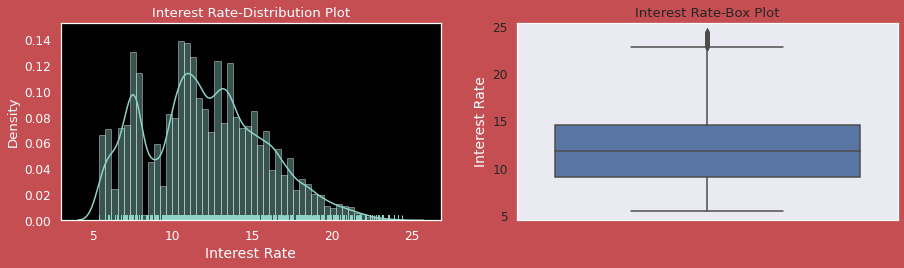

In [ ]:
#Univariate Analysis of Interest Rate Variable

plt.figure(figsize=(15,8),facecolor='r')


with plt.style.context('dark_background'):
  #subplot 1

  plt.subplot(2,2,1)
  ax=sns.distplot(loan['int_rate'],rug=True)
  ax.set(title='Interest Rate-Distribution Plot')
  ax.set_xlabel('Interest Rate',Fontsize=14,color='w')

#subplot 2
sns.set_style("dark")
plt.subplot(2,2,2)
ax=sns.boxplot(y=loan['int_rate'])
ax.set(title='Interest Rate-Box Plot')
ax.set_ylabel('Interest Rate',Fontsize=14,color='w')



#Findings:
#1.Most of the interest rates are in the range 10%-15%


Text(0, 0.5, 'Annual Income')

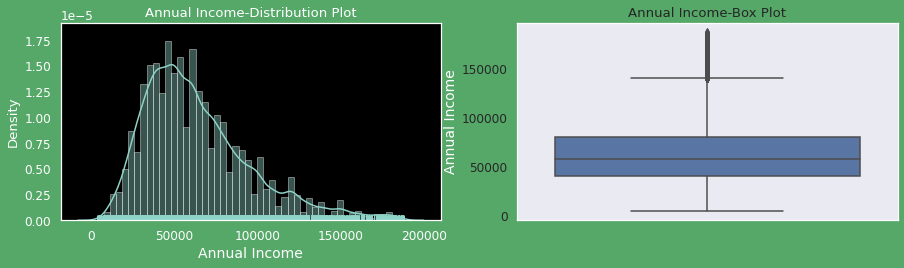

In [ ]:
#Univariate Analysis of Annual Income

plt.figure(figsize=(15,8),facecolor='g')


with plt.style.context('dark_background'):
  #Subplot1
  plt.subplot(2,2,1)
  ax=sns.distplot(loan['annual_inc'],rug=True)
  ax.set(title='Annual Income-Distribution Plot')
  ax.set_xlabel('Annual Income',Fontsize=14,color='w')

#Subplot2
sns.set_style("dark")
plt.subplot(2,2,2)
ax=sns.boxplot(y=loan['annual_inc'])
ax.set(title='Annual Income-Box Plot')
ax.set_ylabel('Annual Income',Fontsize=14,color='w')

#Findings:

In [ ]:

# np.random.seed(19680801)


# def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
#     """
#     Draw a gradient image based on a colormap.

#     Parameters
#     ----------
#     ax : Axes
#         The axes to draw on.
#     extent
#         The extent of the image as (xmin, xmax, ymin, ymax).
#         By default, this is in Axes coordinates but may be
#         changed using the *transform* keyword argument.
#     direction : float
#         The direction of the gradient. This is a number in
#         range 0 (=vertical) to 1 (=horizontal).
#     cmap_range : float, float
#         The fraction (cmin, cmax) of the colormap that should be
#         used for the gradient, where the complete colormap is (0, 1).
#     **kwargs
#         Other parameters are passed on to `.Axes.imshow()`.
#         In particular useful is *cmap*.
#     """
#     phi = direction * np.pi / 2
#     v = np.array([np.cos(phi), np.sin(phi)])
#     X = np.array([[v @ [1, 0], v @ [1, 1]],
#                   [v @ [0, 0], v @ [0, 1]]])
#     a, b = cmap_range
#     X = a + (b - a) / X.max() * X
#     im = ax.imshow(X, extent=extent, interpolation='bicubic',
#                    vmin=0, vmax=1, **kwargs)
#     return im


# def gradient_bar(ax, x, y, width=0.5, bottom=0):
#     for left, top in zip(x, y):
#         right = left + width
#         gradient_image(ax, extent=(left, right, bottom, top),
#                        cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))


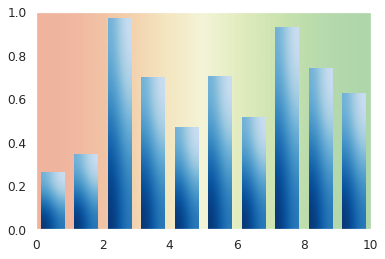

In [ ]:

# xmin, xmax = xlim = 0, 10
# ymin, ymax = ylim = 0, 1

# fig, ax = plt.subplots()
# ax.set(xlim=xlim, ylim=ylim, autoscale_on=False)

# # background image
# gradient_image(ax, direction=1, extent=(0, 1, 0, 1), transform=ax.transAxes,
#                cmap=plt.cm.RdYlGn, cmap_range=(0.2, 0.8), alpha=0.5)

# N = 10
# x = np.arange(N) + 0.15
# y = np.random.rand(N)
# gradient_bar(ax, x, y, width=0.7)
# ax.set_aspect('auto')
# plt.show()

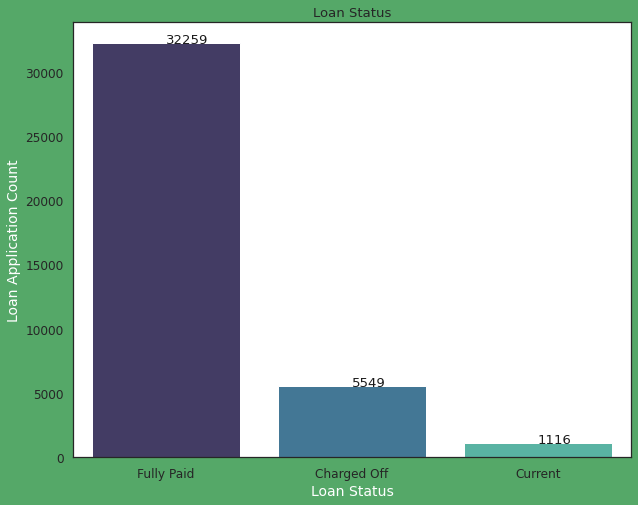

In [ ]:
#Univariate Analysis-Unordered Categorical Variables -Loan Status
plt.figure(figsize=(10,8),facecolor='g')
sns.set_style("white")
ax=sns.countplot(x="loan_status",data=loan,palette='mako')
ax.set(title='Loan Status')
ax.set_xlabel('Loan Status',fontsize=14,color='w')
ax.set_ylabel('Loan Application Count',fontsize=14,color='w')

s=loan['loan_status'].value_counts()
for i,v in s.reset_index().iterrows():
  ax.text(i,v.loan_status+0.3,v.loan_status,color='k')

#Findings:
#The following plot shows that around 14% loans were charged off out of the total loans issued

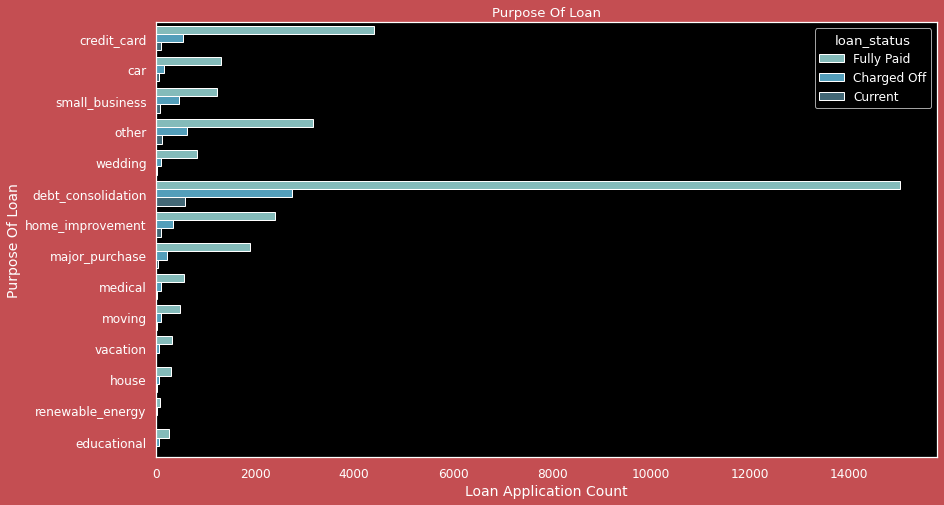

In [ ]:
#Univariate Analysis- Unordered Categorical Variables-Purpose of Loan

plt.figure(figsize=(14,8),facecolor='r')
# sns.set_style("dark")
with plt.style.context('dark_background'):
  ax=sns.countplot(y="purpose",data=loan,hue='loan_status',palette='GnBu_d')
  ax.set(title='Purpose Of Loan')
  ax.set_ylabel('Purpose Of Loan',fontsize=14,color='w')
  ax.set_xlabel('Loan Application Count',fontsize=14,color='w')
  plt.show()
#Findings:
#The Count Plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
#Number of charged off count also high too for these loans.


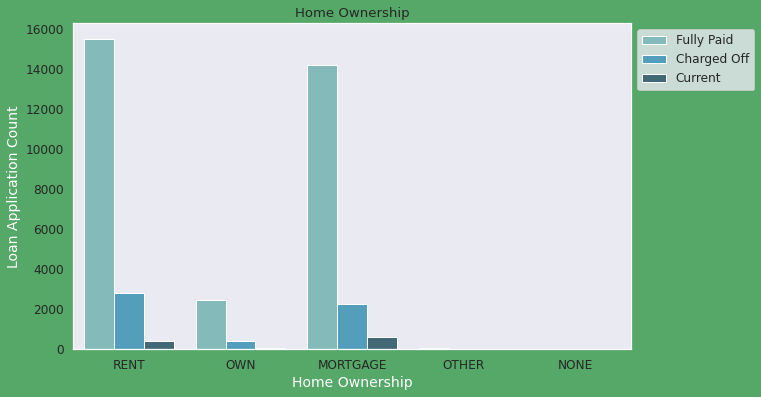

In [ ]:
#Univariate Analysis-Unordered Categorical Variable-Home Ownership
plt.figure(figsize=(10,6),facecolor='g')
ax=sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Home Ownership')
ax.set_xlabel('Home Ownership',fontsize=14,color='w')
ax.set_ylabel('Loan Application Count',fontsize=14,color='w')
plt.show()

#Findings:
# The Count plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.







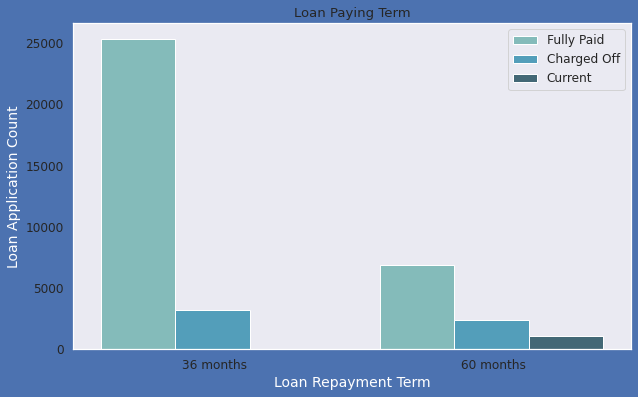

In [ ]:
#Univariate analysis- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='b')
ax=sns.countplot(x="term",data=loan,hue='loan_status',palette='GnBu_d')
ax.set(title='Loan Paying Term')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()
# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

In [ ]:
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'pub_rec_bankruptcies',
       'loan_amnt_categories', 'annual_inc_categories',
       'interest_rate_categories', 'dti_categories'],
      dtype='object')

#### Correlation of interest rate with all columns

* Pearson
* Spearman
* KendallTau


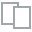
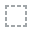
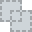
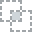
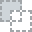
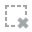
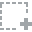
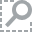
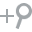
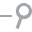
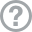
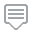
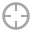
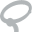
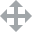
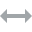
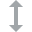
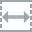
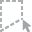
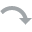
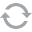
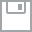
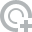
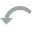
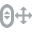
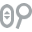
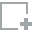
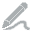
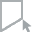
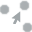
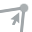
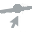

In [ ]:
plot_correlation(loan,"int_rate")

**Bivariate Analysis-Part 1**
In this section we will analyze the loan status against some important columns which might have an impact on charged off loans.

In [ ]:
#Bivariate Analysis on annual income on Charged Off Loans

inc_range_vs_loan = loan.groupby(['annual_inc_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Findings:
# 1.Income range 80000+  has less chances of charged off.
# 2.Income range 0-20000 has high chances of charged off.
# 3.Notice that with increase in annual income charged off proportion got decreased. So, they are inversely proportional.

loan_status,annual_inc_categories,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.199327
1,20000-40000,1514,170,7004,8688,0.174263
2,40000-60000,1729,345,9534,11608,0.148949
3,60000-80000,1024,240,6597,7861,0.130263
4,80000+,1045,352,8181,9578,0.109104


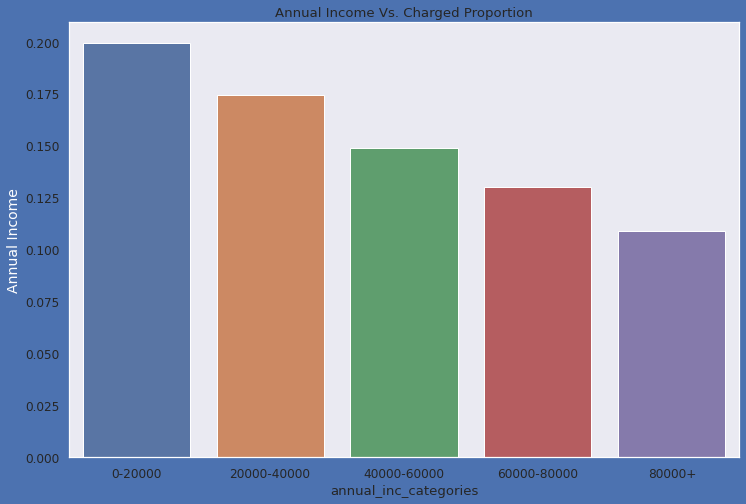

In [ ]:
#Drawing Barplots on above calculated data
fig,ax1=plt.subplots(figsize=(12,8),facecolor='b')
ax1.set(title='Annual Income Vs. Charged Proportion')
ax1=sns.barplot(x='annual_inc_categories',y='Chargedoff_Proportion',data=inc_range_vs_loan)
ax.set_xlabel('Charged Off Proportion',fontsize=14,color='w')
ax1.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()
#Findings:
# 1.Income range 80000+  has less chances of charged off.
# 2.Income range 0-20000 has high chances of charged off.
# 3.Notice that with increase in annual income charged off proportion got decreased. So, they are inversely proportional.

In [ ]:
#Bivariate Analysis for purpose of Loan Vs Charged Off Proportion

purpose_vs_loan=loan.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total']=purpose_vs_loan['Charged Off']+purpose_vs_loan['Current']+purpose_vs_loan['Fully Paid']
purpose_vs_loan['ChargedOff_Proportion']=purpose_vs_loan['Charged Off']/purpose_vs_loan['Total']
purpose_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

# Findings:
# 1.Small Business applicants have high chances of getting charged off.
# 2.Renewable_energy where chanrged off proportion is better as compare to other categories.


loan_status,purpose,Charged Off,Current,Fully Paid,Total,ChargedOff_Proportion
11,small_business,469.0,73.0,1229.0,1771.0,0.264822
10,renewable_energy,18.0,1.0,79.0,98.0,0.183673
3,educational,54.0,0.0,265.0,319.0,0.169279
7,medical,106.0,10.0,555.0,671.0,0.157973
9,other,617.0,124.0,3173.0,3914.0,0.157639
8,moving,90.0,7.0,476.0,573.0,0.157068
5,house,57.0,14.0,296.0,367.0,0.155313
2,debt_consolidation,2743.0,577.0,15036.0,18356.0,0.149433
12,vacation,53.0,6.0,319.0,378.0,0.140212
4,home_improvement,335.0,95.0,2405.0,2835.0,0.118166


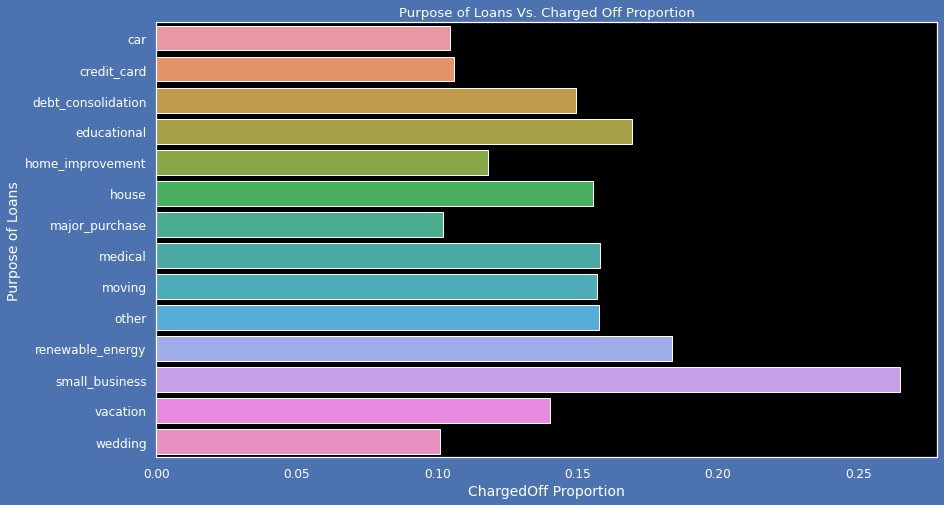

In [ ]:
#Drawing Bar Charts from above data

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(14,8),facecolor='b')
  ax1.set(title='Purpose of Loans Vs. Charged Off Proportion')
  ax1=sns.barplot(y='purpose',x='ChargedOff_Proportion',data=purpose_vs_loan)
  ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
  ax1.set_xlabel('ChargedOff Proportion',fontsize=14,color='w')
# Findings:
# 1.Small Business applicants have high chances of getting charged off.
# 2.Renewable_energy where chanrged off proportion is better as compare to other categories.


In [ ]:
#Bivariate analysis of grade against Charged Off Proportion

grade_vs_loan=loan.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total']=grade_vs_loan['Charged Off']+grade_vs_loan['Current']+grade_vs_loan['Fully Paid']
grade_vs_loan['ChargedOff_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

#Findings:
#1.Grade A has least chances of getting charged off
#2.Grade F and Grade G have high chances of getting charged off
#3.Chances of getting charged off is increasing  with grades moving from A to G


loan_status,grade,Charged Off,Current,Fully Paid,Total,ChargedOff_Proportion
6,G,97,16,187,300,0.323333
5,F,308,69,627,1004,0.306773
4,E,697,173,1882,2752,0.253270
3,D,1105,216,3871,5192,0.212827
2,C,1338,261,6338,7937,0.168578
1,B,1404,341,10048,11793,0.119054
0,A,600,40,9306,9946,0.060326


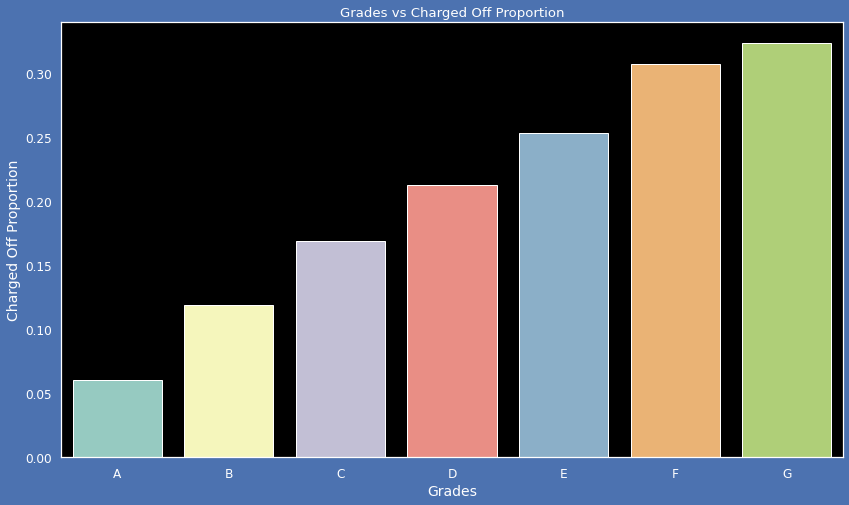

In [ ]:
#Drawing Bar Charts for above data

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(14,8),facecolor='b')
  ax1.set(title='Grades vs Charged Off Proportion')
  ax1=sns.barplot(x='grade',y='ChargedOff_Proportion',data=grade_vs_loan)
  ax1.set_xlabel('Grades',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')

#Findings:
#1.Grade A has least chances of getting charged off
#2.Grade F and Grade G have high chances of getting charged off
#3.Chances of getting charged off is increasing  with grades moving from A to G

In [ ]:
#Bivariate Analysis on sub grade against Charged Off Proportion

grade_vs_loan=loan.groupby(['sub_grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total']=grade_vs_loan['Charged Off']+grade_vs_loan['Current']+grade_vs_loan['Fully Paid']
grade_vs_loan['ChargedOff_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

#Findings:
#1.Sub Grade A has least chances of getting charged off
#2.Sub Grade F and Sub Grade G have high chances of getting charged off
#3.Chances of getting charged off is increasing  with  Subgrades moving from A to G


loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,ChargedOff_Proportion
29,F5,53.0,4.0,52.0,109.0,0.486239
32,G3,19.0,3.0,24.0,46.0,0.413043
31,G2,26.0,1.0,47.0,74.0,0.351351
34,G5,9.0,0.0,18.0,27.0,0.333333
28,F4,51.0,16.0,95.0,162.0,0.314815
30,G1,31.0,10.0,61.0,102.0,0.303922
23,E4,125.0,27.0,290.0,442.0,0.282805
27,F3,50.0,11.0,117.0,178.0,0.280899
26,F2,67.0,15.0,157.0,239.0,0.280335
25,F1,87.0,23.0,206.0,316.0,0.275316


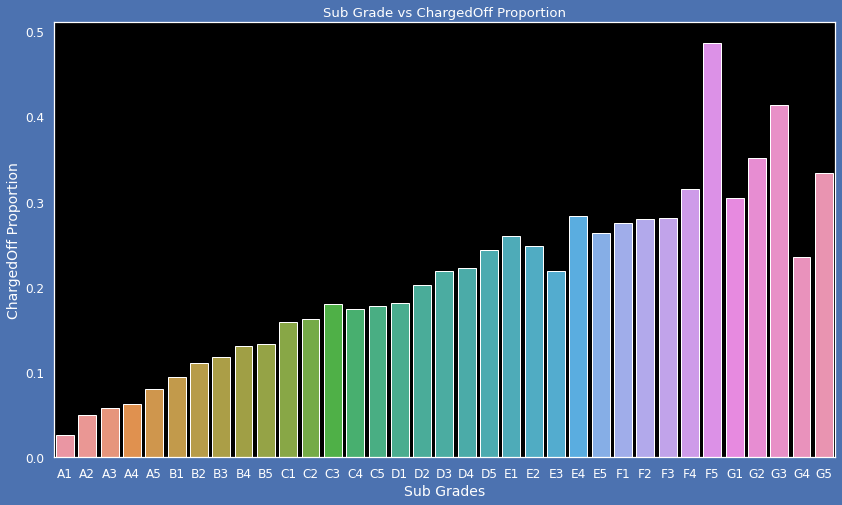

In [ ]:
#Drawing Bar Plot from above analysis
with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(14,8),facecolor='b')
  ax1.set(title='Sub Grade vs ChargedOff Proportion')
  ax1=sns.barplot(x='sub_grade',y='ChargedOff_Proportion',data=grade_vs_loan)
  ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
  ax1.set_ylabel('ChargedOff Proportion',fontsize=14,color='w')

#Findings:
#1.Sub Grade A has least chances of getting charged off
#2.Sub Grade F and Sub Grade G have high chances of getting charged off
#3.Chances of getting charged off is increasing  with  Subgrades moving from A to G



In [ ]:
#Bivariate analysis on interest rate against
interest_vs_loan=loan.groupby(['interest_rate_categories','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total']=interest_vs_loan['Charged Off']+interest_vs_loan['Current']+interest_vs_loan['Fully Paid']
interest_vs_loan['ChargedOff_Proportion']=interest_vs_loan['Charged Off']/interest_vs_loan['Total']
interest_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

#Findings:
#1.Interest Rates which are less than 10% have very less chances of charged off.
#2.Interest Rates greater than 16
#3.Charged Off Proportion increases with higher interest rates

loan_status,interest_rate_categories,Charged Off,Current,Fully Paid,Total,ChargedOff_Proportion
3,16+,1241,348,3267,4856,0.255560
2,12.5-16,1985,328,9254,11567,0.171609
1,10-13,1217,266,7984,9467,0.128552
0,0-10,822,77,11314,12213,0.067305


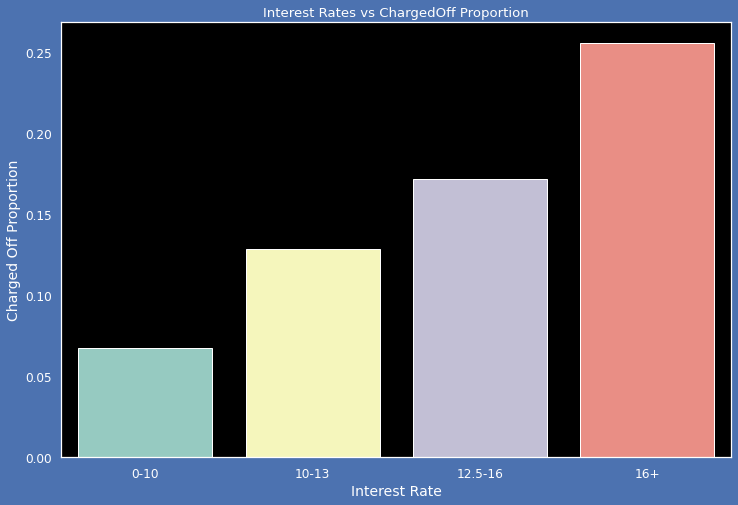

In [ ]:
#Drawing bar chart for above analysis

with plt.style.context('dark_background'):
  fig1,ax1=plt.subplots(figsize=(12,8),facecolor='b')
  ax1.set(title='Interest Rates vs ChargedOff Proportion')
  ax1=sns.barplot(x='interest_rate_categories',y='ChargedOff_Proportion',data=interest_vs_loan)
  ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')

#Findings:
#1.Interest Rates which are less than 10% have very less chances of charged off.
#2.Interest Rates greater than 16
#3.Charged Off Proportion increases with higher interest rates



In [ ]:
#Bivariate analysis on employment length vs Charged Off Proportion
emplen_vs_loan=loan.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total']=emplen_vs_loan['Charged Off']+emplen_vs_loan['Current']+emplen_vs_loan['Fully Paid']
emplen_vs_loan['ChargedOff_Proportion']=emplen_vs_loan['Charged Off']/emplen_vs_loan['Total']
emplen_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)
#Findings:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,ChargedOff_Proportion
0,0,226,42,796,1064,0.212406
10,10,1304,383,6935,8622,0.151241
7,7,261,61,1424,1746,0.149485
1,1,1085,143,6476,7704,0.140836
5,5,451,87,2685,3223,0.139932
8,8,200,42,1198,1440,0.138889
6,6,303,57,1827,2187,0.138546
3,3,549,79,3399,4027,0.136330
4,4,454,93,2821,3368,0.134798
2,2,560,97,3650,4307,0.130021


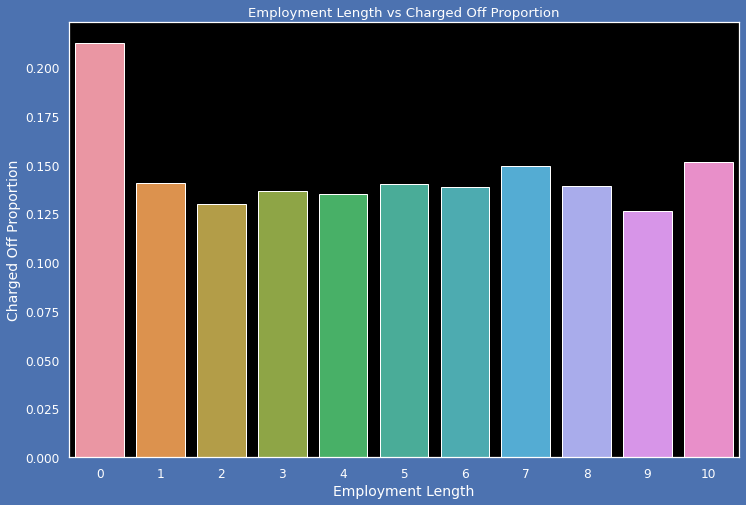

In [ ]:
#Draw Bar chart with above variable

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(12,8),facecolor='b')
  ax1.set(title='Employment Length vs Charged Off Proportion')
  ax1=sns.barplot(x='emp_length',y='ChargedOff_Proportion',data=emplen_vs_loan)
  ax1.set_xlabel('Employment Length',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
  plt.show()

#Findings:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

In [ ]:
#Bivariate Analysis on address state against ChargedOff Proportion

state_vs_loan=loan.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total']=state_vs_loan['Charged Off']+state_vs_loan['Current']+state_vs_loan['Fully Paid']
state_vs_loan['ChargedOff_Proportion']=state_vs_loan['Charged Off']/state_vs_loan['Total']
state_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

#Findings:
#1. States NE has very high chances of charged off but number of applications are too low to make any decisions.
#2.States NV,CA and FL states shows good number of charged offs in good number of applications.


loan_status,addr_state,Charged Off,Current,Fully Paid,Total,ChargedOff_Proportion
28,NE,3.0,0.0,2.0,5.0,0.600000
32,NV,106.0,17.0,367.0,490.0,0.216327
40,SD,12.0,2.0,50.0,64.0,0.187500
0,AK,14.0,2.0,62.0,78.0,0.179487
9,FL,496.0,85.0,2234.0,2815.0,0.176199
24,MO,114.0,16.0,549.0,679.0,0.167894
13,ID,1.0,0.0,5.0,6.0,0.166667
31,NM,30.0,5.0,149.0,184.0,0.163043
11,HI,28.0,7.0,138.0,173.0,0.161850
4,CA,1108.0,149.0,5700.0,6957.0,0.159264


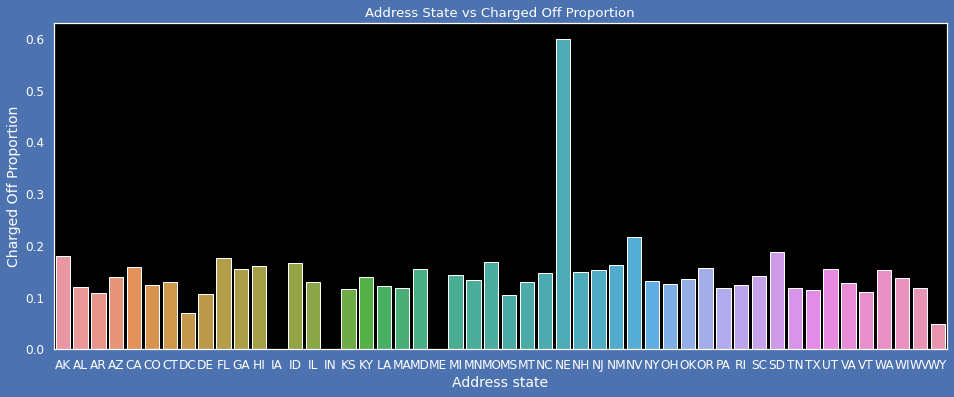

In [ ]:
#Drawing Charts from above analysis

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(16,6),facecolor='b')
  ax1.set(title='Address State vs Charged Off Proportion')
  ax1=sns.barplot(x='addr_state',y='ChargedOff_Proportion',data=state_vs_loan)
  ax1.set_xlabel('Address state',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
#Findings:
#1. States NE has very high chances of charged off but number of applications are too low to make any decisions.
#2.States NV,CA and FL states shows good number of charged offs in good number of applications.


In [ ]:
#Bivariate analysis of verification status against Charged Off Proportion

verify_vs_loan=loan.groupby(['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verify_vs_loan['Total']=verify_vs_loan['Charged Off']+verify_vs_loan['Fully Paid']+verify_vs_loan['Current']
verify_vs_loan['ChargedOff_Proportion']=verify_vs_loan['Charged Off']+verify_vs_loan['Total']
verify_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)


#Findings:
#1.As there is not much difference in Charged off proportions, the variable doesn't provide any insight on Charged Off Proportion

loan_status,verification_status,Charged Off,Current,Fully Paid,Total,ChargedOff_Proportion
0,Not Verified,2121,227,14408,16756,18877
2,Verified,2015,585,9820,12420,14435
1,Source Verified,1413,304,8031,9748,11161


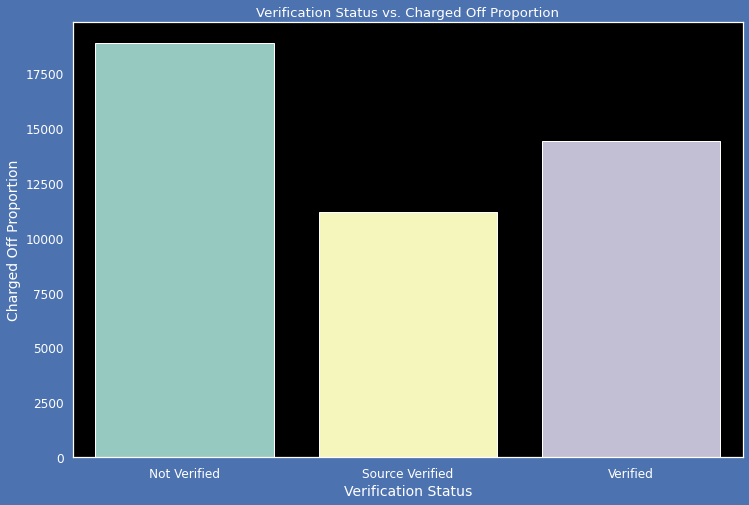

In [ ]:
#Drawing Bar Plot for above Cases

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(12,8),facecolor='b')
  ax1.set_title('Verification Status vs. Charged Off Proportion')
  ax1=sns.barplot(x='verification_status',y='ChargedOff_Proportion',data=verify_vs_loan)
  ax1.set_xlabel('Verification Status',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
  plt.show()
#Findings:
#1.As there is not much difference in Charged off proportions, the variable doesn't provide any insight on Charged Off Proportion

In [ ]:
#Bivariate analysis on pub_rec_bankruptcies against ChargedOff Proportion

bankruptcies_vs_loan=loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid']
bankruptcies_vs_loan['ChargedOff_Proportion']=bankruptcies_vs_loan['Charged Off']/bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('ChargedOff_Proportion', ascending=False)

#Findings:
#1. Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
#2. pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
#3. Not known is the column for which we don't have any information abount borrower.
#4. This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,ChargedOff_Proportion
2,2,2.0,2.0,3.0,7.0,0.285714
1,1,364.0,37.0,1260.0,1661.0,0.219145
3,Not Known,115.0,0.0,561.0,676.0,0.170118
0,0,5068.0,1077.0,30435.0,36580.0,0.138546


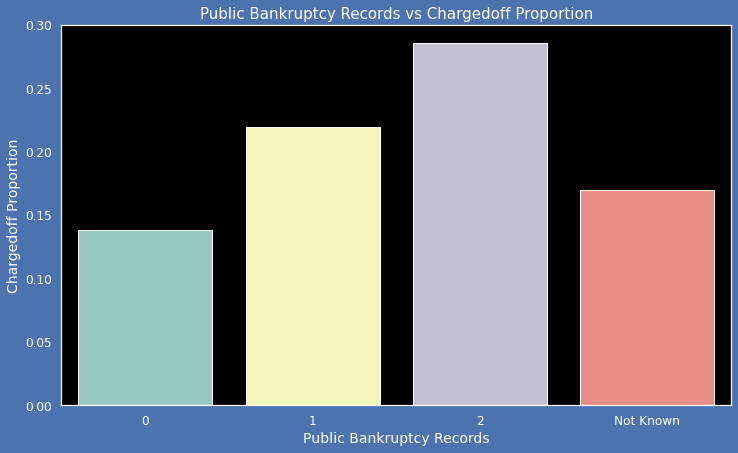

In [ ]:
#Drawing Bar Plots for above Variables

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(12,7),facecolor='b')
  ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
  ax1=sns.barplot(x='pub_rec_bankruptcies',y='ChargedOff_Proportion',data=bankruptcies_vs_loan)
  ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
  ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')


#Findings:
#1. Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
#2. pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
#3. Not known is the column for which we don't have any information abount borrower.
#4. This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

In [ ]:
#Bivariate analysis of Derogatory Public Records vs. Charged Off Proportion
bankruptcies_vs_loan=loan.groupby(['pub_rec','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
# your ability to qualify for credit or other services. Public records and collections are derogatory items
# because they reflect financial obligations that were not paid as agreed.
# Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
# pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

loan_status,pub_rec,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
1,1,452.0,43.0,1542.0,2037.0,0.221895
2,2,10.0,3.0,37.0,50.0,0.200000
0,0,5087.0,1070.0,30671.0,36828.0,0.138129
3,3,0.0,0.0,7.0,7.0,0.000000
4,4,0.0,0.0,2.0,2.0,0.000000


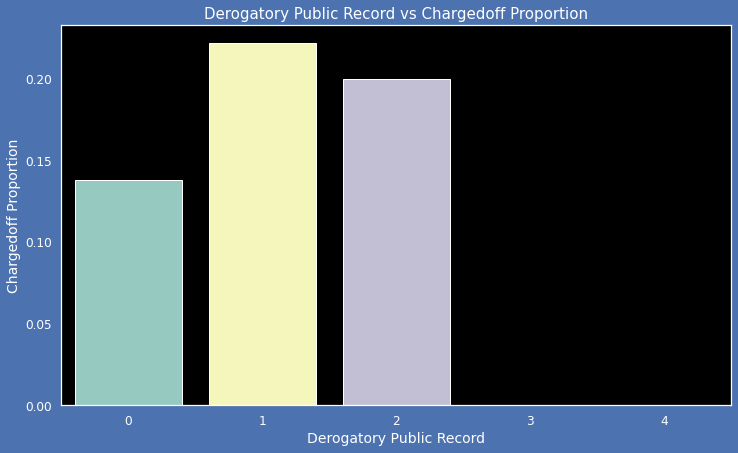

In [ ]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

with plt.style.context('dark_background'):
  fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
  ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='w')
  ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
  ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='w')
  ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
  plt.show()

# Observations:
# A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
# your ability to qualify for credit or other services. Public records and collections are derogatory items
# because they reflect financial obligations that were not paid as agreed.
# Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
# pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

**Bivariate Analysis - 2**

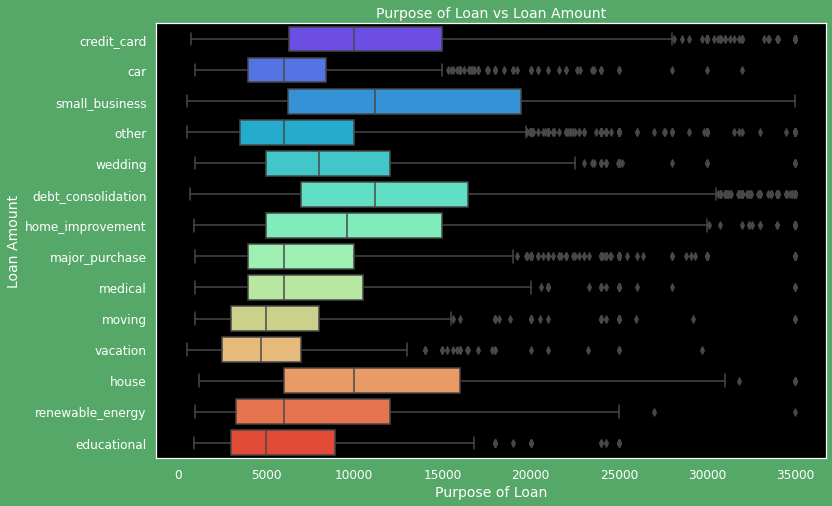

In [ ]:
#Bivariate Analysis Purpose of Loan Vs Loan amount

with plt.style.context('dark_background'):
  plt.figure(figsize=(12,8),facecolor='g')
  ax=sns.boxplot(y='purpose',x='loan_amnt',data=loan,palette='rainbow')
  ax.set_title('Purpose of Loan vs Loan Amount',fontsize=14,color='w')
  ax.set_xlabel('Purpose of Loan',fontsize=14,color='w')
  ax.set_ylabel('Loan Amount',fontsize=14,color='w')
  plt.show()

#Findings:
# 1.Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# 2.Debt consolidation is second and Credit card comes 3rd.

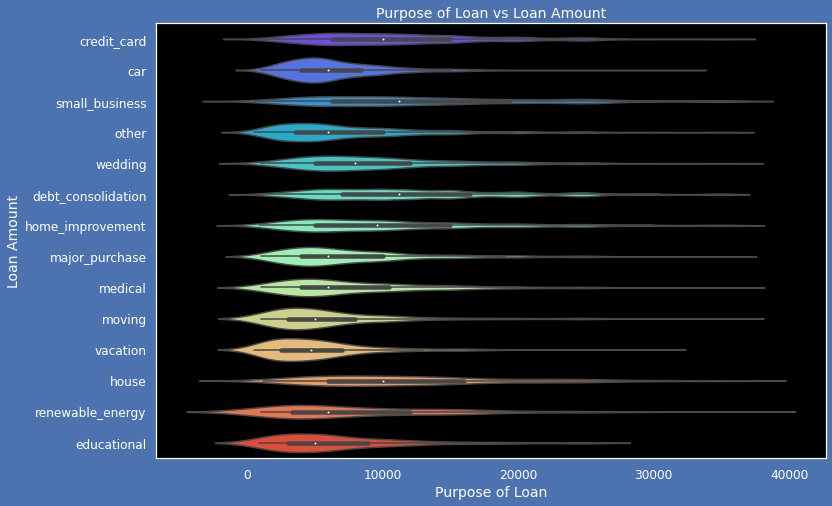

In [ ]:
#Bivariate Analysis -Purpose of Loan Vs. Loan amount-Violin Plot

with plt.style.context('dark_background'):
  plt.figure(figsize=(12,8),facecolor='b')
  ax=sns.violinplot(y='purpose',x='loan_amnt',data=loan,palette='rainbow')
  ax.set_title('Purpose of Loan vs Loan Amount',fontsize=14,color='w')
  ax.set_xlabel('Purpose of Loan',fontsize=14,color='w')
  ax.set_ylabel('Loan Amount',fontsize=14,color='w')
  plt.show()
# Findings:
#1. Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed
# as compare to loan taken for other purposes.

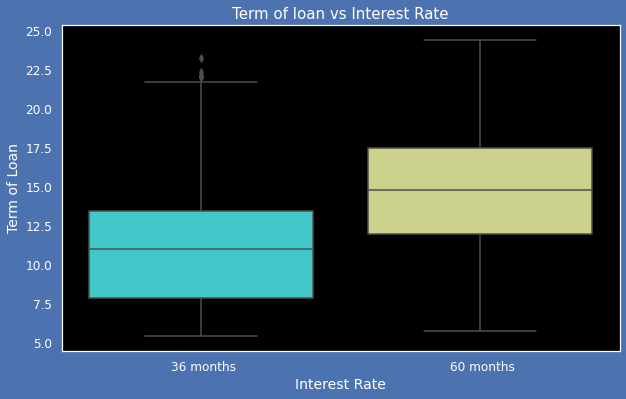

In [ ]:
#Bivariate Analysis-Term of Loan vs. Interest Rate Box Plot

with plt.style.context('dark_background'):
  plt.figure(figsize=(10,6),facecolor='b')
  ax=sns.boxplot(y='int_rate',x='term',data=loan,palette='rainbow')
  ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
  ax.set_xlabel('Interest Rate',fontsize=14,color='w')
  ax.set_ylabel('Term of Loan',fontsize=14,color='w')
  plt.show()

# Findings:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

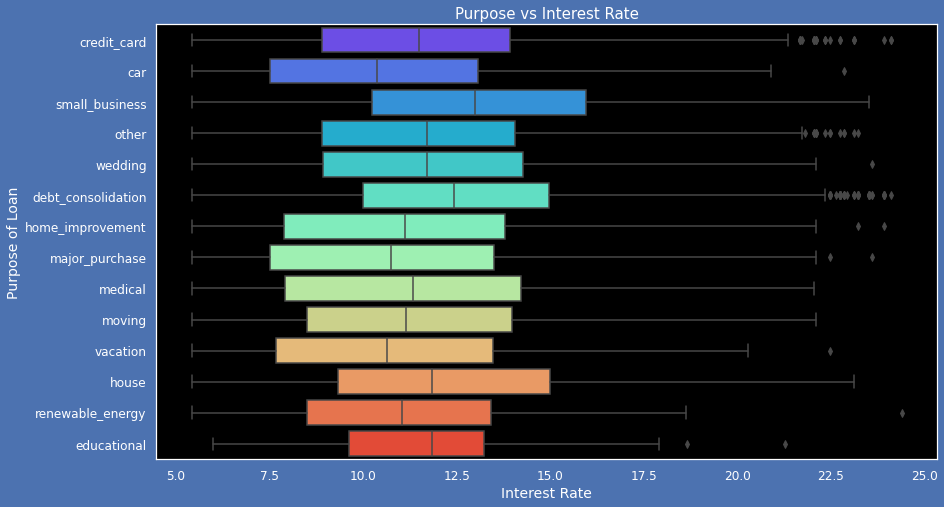

In [ ]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

with plt.style.context('dark_background'):
  plt.figure(figsize=(14,8),facecolor='b')
  ax = sns.boxplot(x='int_rate', y='purpose', data =loan,palette='rainbow')
  ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
  ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
  ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
  plt.show()

# Observations:
# It is clear that avearge intrest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
# Debt consolidation is 2nd where borrowers had to pay more interest rate.

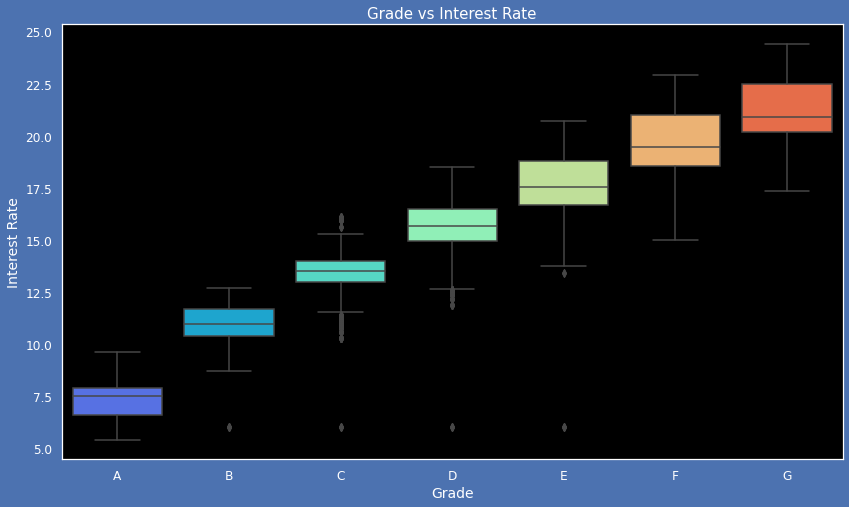

In [ ]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

with plt.style.context('dark_background'):
  plt.figure(figsize=(14,8),facecolor='b')
  ax = sns.boxplot(y='int_rate', x='grade', data =loan,palette='rainbow',order = 'ABCDEFG')
  ax.set_title('Grade vs Interest Rate',fontsize=15,color='W')
  ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
  ax.set_xlabel('Grade',fontsize=14,color = 'w')
  plt.show()

# Observations:
# A-grade is a top letter grade for a lender to assign to a borrower.
# The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
# It is clear that intrest rate is increasing with grades moving from A to F.

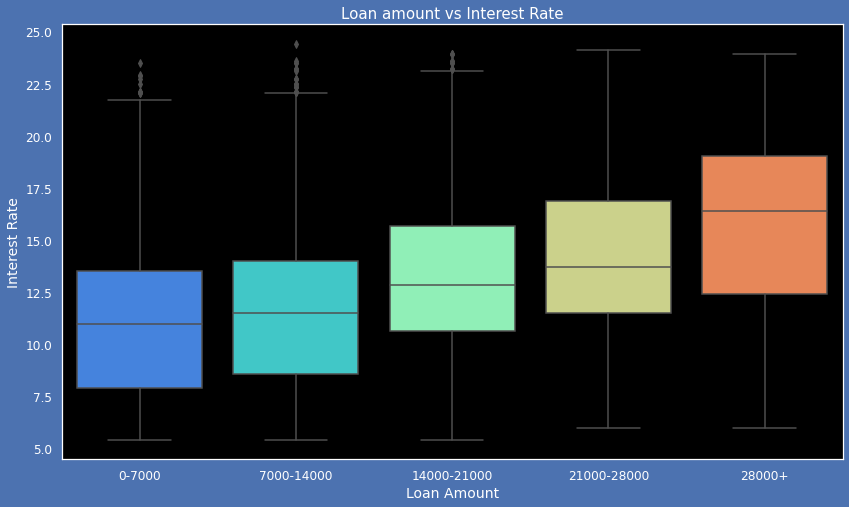

In [ ]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

with plt.style.context('dark_background'):
  plt.figure(figsize=(14,8),facecolor='b')
  ax = sns.boxplot(y='int_rate', x='loan_amnt_categories', data =loan,palette='rainbow')
  ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
  ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
  ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
  plt.show()

# Observations:
# It is clear that intrest rate is increasing with loan amount increase.
# probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the
# interest rate.

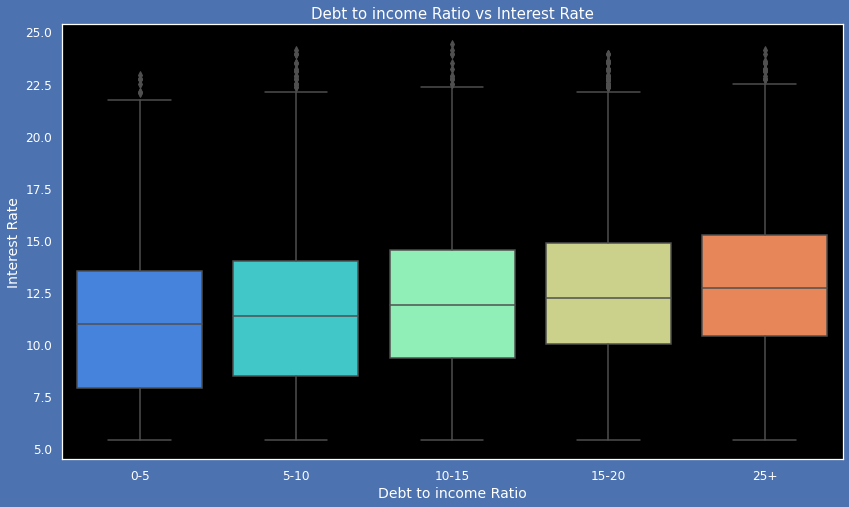

In [ ]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

with plt.style.context('dark_background'):
  plt.figure(figsize=(14,8),facecolor='b')
  ax = sns.boxplot(y='int_rate', x='dti_categories', data =loan,palette='rainbow')
  ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
  ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
  ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
  plt.show()

# Observations:
# If your DTI is low enough you may get a lower interest rate.
# Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.
